# Sentiment Analysis by Product Category

This notebook explores how customer sentiment varies across product categories. We use the `sentiment_polarity` feature to identify trends, satisfaction levels, and potential issues by category group.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_parquet("/content/engineered_features.parquet")
print("Data loaded:", df.shape)

Data loaded: (9480, 47)


## Sentiment Distribution by Category Group

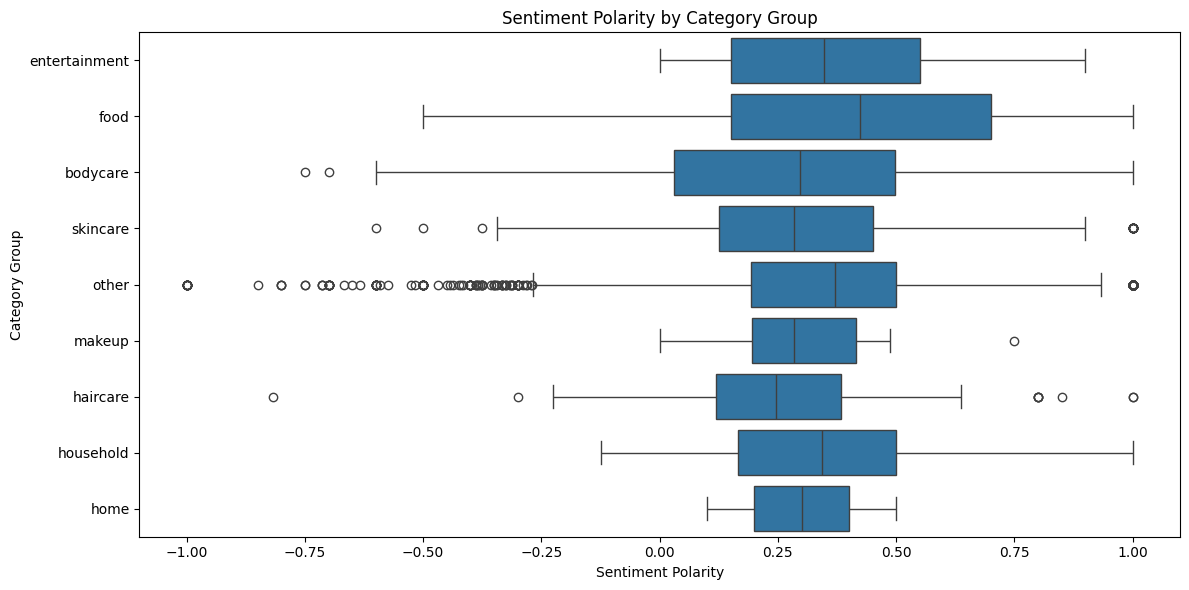

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(y='category_group', x='sentiment_polarity', data=df, orient='h')
plt.title("Sentiment Polarity by Category Group")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Category Group")
plt.tight_layout()
plt.show()

## Average Sentiment per Category

/tmp/ipython-input-1688531335.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_summary.index, y=sentiment_summary['mean'], palette='coolwarm')


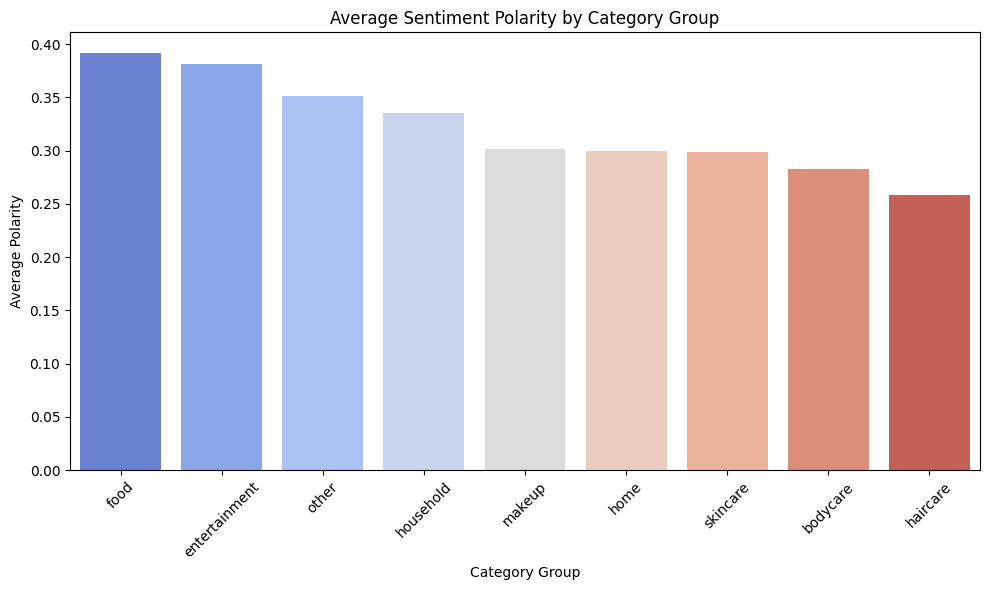

In [ ]:
sentiment_summary = df.groupby('category_group')['sentiment_polarity'].agg(['mean', 'std', 'count']).sort_values('mean', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_summary.index, y=sentiment_summary['mean'], palette='coolwarm')
plt.title("Average Sentiment Polarity by Category Group")
plt.xticks(rotation=45)
plt.ylabel("Average Polarity")
plt.xlabel("Category Group")
plt.tight_layout()
plt.show()

## Sentiment Distribution Histogram

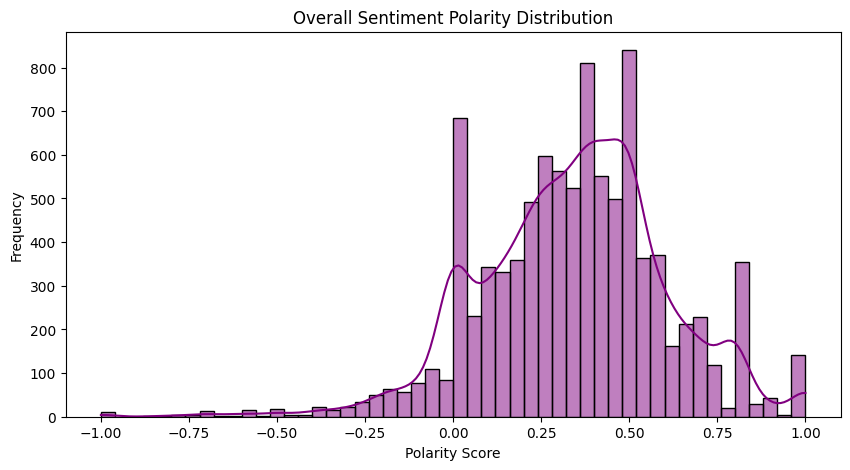

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['sentiment_polarity'], bins=50, kde=True, color='purple')
plt.title("Overall Sentiment Polarity Distribution")
plt.xlabel("Polarity Score")
plt.ylabel("Frequency")
plt.show()

## Export Summary Table

In [ ]:
sentiment_summary.to_csv("sentiment_by_category_summary.csv")